# **RSA algorithm (Rivest-Shamir-Adleman)**

### **Importing the Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import time
from timeit import default_timer as timer
from datetime import timedelta

In [ ]:
#Variables to store time taken for encryption and decryption
encryption_image = []
encryption_type = []
encryption_time = []

decryption_image = []
decryption_type = []
decryption_time = []

###Steps in the RSA Algorithm (Common to all)

In [ ]:
# STEP 1: Generate Two Large Prime Numbers (p,q) randomly
from random import randrange, getrandbits

def power(a,d,n):
  ans=1;
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans;


def MillerRabin(N,d):
  a = randrange(2, N - 1)
  x=power(a,d,N);
  if x==1 or x==N-1:
    return True;
  else:
    while(d!=N-1):
      x=((x%N)*(x%N))%N;
      if x==1:
        return False;
      if x==N-1:
        return True;
      d<<=1;
  return False;


def is_prime(N,K):
  if N==3 or N==2:
    return True;
  if N<=1 or N%2==0:
    return False;
  
  #Find d such that d*(2^r)=X-1
  d=N-1
  while d%2!=0:
    d/=2;

  for _ in range(K):
    if not MillerRabin(N,d):
      return False;
  return True;  
  



def generate_prime_candidate(length):
  # generate random bits
  p = getrandbits(length)
  # apply a mask to set MSB and LSB to 1
  # Set MSB to 1 to make sure we have a Number of 1024 bits.
  # Set LSB to 1 to make sure we get a Odd Number.
  p |= (1 << length - 1) | 1
  return p



def generatePrimeNumber(length):
  A=4
  while not is_prime(A, 128):
        A = generate_prime_candidate(length)
  return A



length=5
P=generatePrimeNumber(length)
Q=generatePrimeNumber(length)

print(P)
print(Q)

31
29


In [ ]:
#Step 2: Calculate N=P*Q and Euler Totient Function = (P-1)*(Q-1)
# start_time = time.time()
N=P*Q
eulerTotient=(P-1)*(Q-1)
print(N)
print(eulerTotient)

# overall_time += time.time() - start_time
# print(overall_time)

899
840


In [ ]:
#Step 3: Find E such that GCD(E,eulerTotient)=1(i.e., e should be co-prime) such that it satisfies this condition:-  1
# start_time = time.time()
def GCD(a,b):
  if a==0:
    return b;
  return GCD(b%a,a)

E=generatePrimeNumber(4)
while GCD(E,eulerTotient)!=1:
  E=generatePrimeNumber(4)
print(E)

# overall_time += time.time() - start_time
# print(overall_time)

11


In [ ]:
# Step 4: Find D. 
#For Finding D: It must satisfies this property:-  (D*E)Mod(eulerTotient)=1;
#Now we have two Choices
# 1. That we randomly choose D and check which condition is satisfying above condition.
# 2. For Finding D we can Use Extended Euclidean Algorithm: ax+by=1 i.e., eulerTotient(x)+E(y)=GCD(eulerTotient,e)
#Here, Best approach is to go for option 2.( Extended Euclidean Algorithm.)

# start_time = time.time()

def gcdExtended(E,eulerTotient):
  a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E

  while d2!=1:

    # k
    k=(d1//d2)

    #a
    temp=a2
    a2=a1-(a2*k)
    a1=temp

    #b
    temp=b2
    b2=b1-(b2*k)
    b1=temp

    #d
    temp=d2
    d2=d1-(d2*k)
    d1=temp

    D=b2

  if D>eulerTotient:
    D=D%eulerTotient
  elif D<0:
    D=D+eulerTotient

  return D


D=gcdExtended(E,eulerTotient)
print(D)

# overall_time += time.time() - start_time
# print(overall_time)

611


## **RSA algorithm with Image 1**

In [ ]:
#variables for storing time
time_taken_e_1 = 0
time_taken_d_1 = 0

### **Image Preprocessing**

(735, 980, 3)


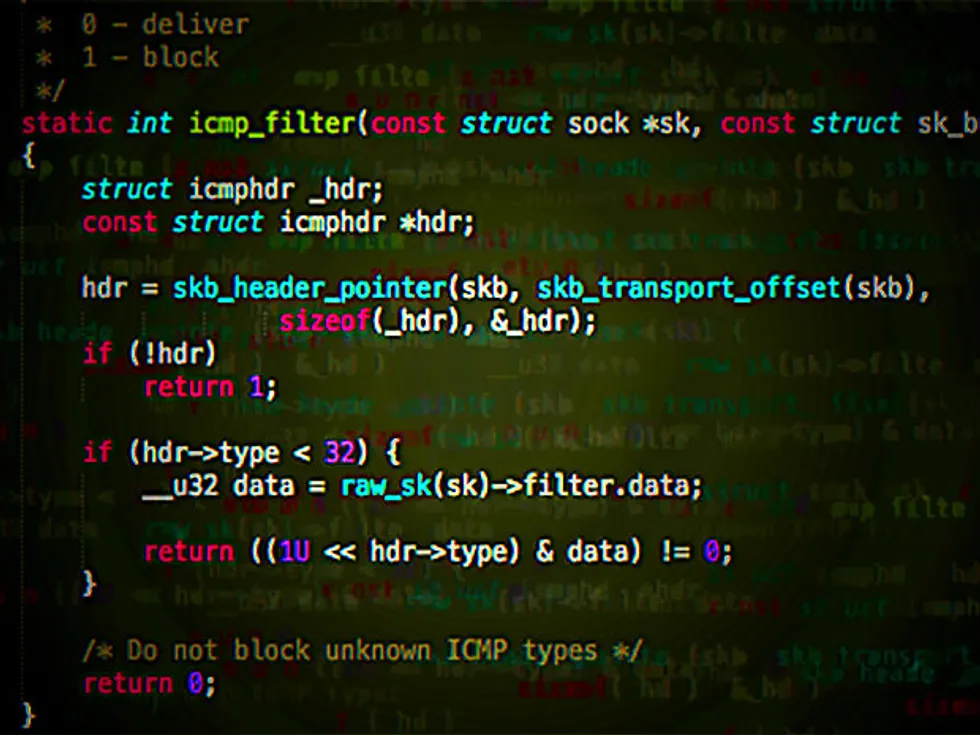


 (256, 256, 3)


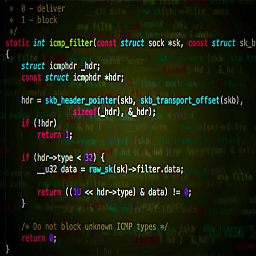

In [ ]:
my_img = cv2.imread('drive/My Drive/CN_Project/1.jpg')
print(my_img.shape)
cv2_imshow(my_img)
#plt.imshow(my_img, cmap="gray")

# Resizing
my_img=cv2.resize(my_img,(256,256))
print('\n',my_img.shape)
cv2_imshow(my_img)

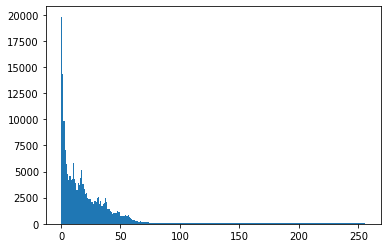

In [ ]:
# alternative way to find histogram of an image
plt.hist(my_img.ravel(),256,[0,256])
plt.show()

### **Image Encryption**

In [ ]:
row,col=my_img.shape[0],my_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]

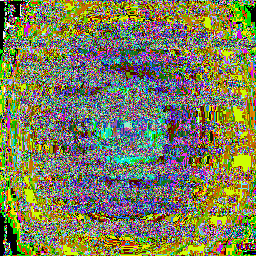

3.080322504043579
3.080441951751709
['Image 1']
['Encryption']
[3.0806164741516113]


In [ ]:
#Step 5: Encryption

start_time = time.time()

for i in range(0,256):
  for j in range(0,256):
    r,g,b=my_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    my_img[i,j]=[C1,C2,C3]

# plt.imshow(my_img, cmap="gray")
cv2_imshow(my_img)

print(time.time() - start_time)
#time_taken_e_1.append(time.time() - start_time)
time_taken_e_1 += time.time() - start_time
print(time_taken_e_1)

encryption_image.append("Image 1")
encryption_type.append("Encryption")
encryption_time.append(time.time() - start_time)

print(encryption_image)
print(encryption_type)
print(encryption_time)

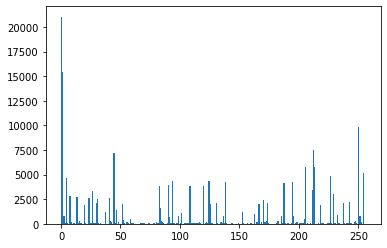

In [ ]:
# Find histogram of an image
plt.hist(my_img.ravel(),256,[0,256])
plt.show()

### **Image Decryption**

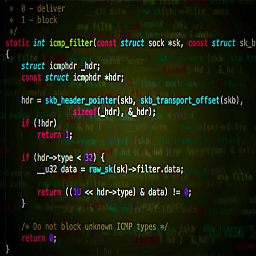

['Image 1']
['Decryption']
[2.521512269973755]


In [ ]:
#Step 6: Decryption

start_time = time.time()

for i in range(0,256):
  for j in range(0,256):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    my_img[i,j]=[M1,M2,M3]

cv2_imshow(my_img)
# plt.imshow(my_img, cmap="gray")

decryption_image.append("Image 1")
decryption_type.append("Decryption")
decryption_time.append(time.time() - start_time)

print(decryption_image)
print(decryption_type)
print(decryption_time)

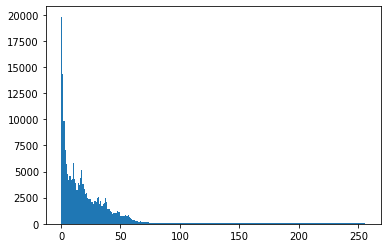

In [ ]:
# Find histogram of an image
plt.hist(my_img.ravel(),256,[0,256])
plt.show()

## **RSA algorithm with Image 2**

In [ ]:
#variables for storing time
time_taken_e_2 = []
time_taken_d_2 = []

### **Image Preprocessing**

(533, 800, 3)


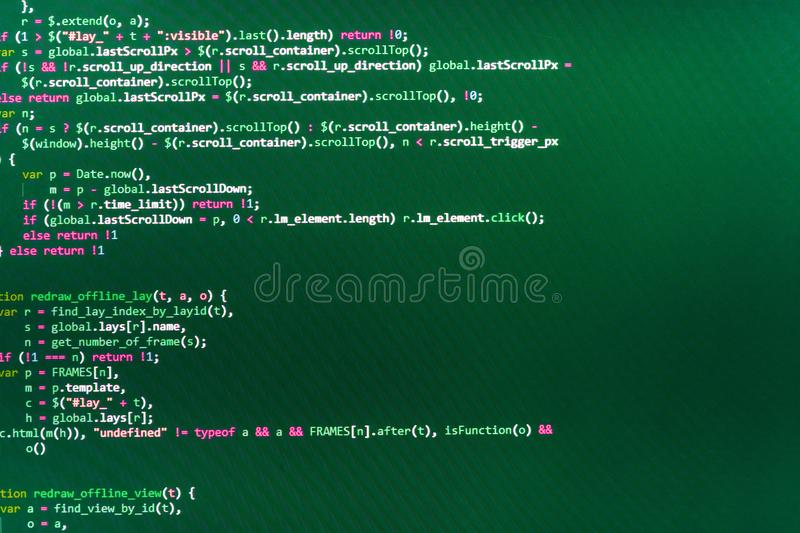


 (256, 256, 3)


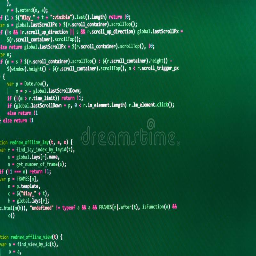

In [ ]:
my_img_2 = cv2.imread('drive/My Drive/CN_Project/2.jpg')
print(my_img_2.shape)
cv2_imshow(my_img_2)
#plt.imshow(my_img_2, cmap="gray")

# Resizing
my_img_2 = cv2.resize(my_img_2,(256,256))
print('\n',my_img_2.shape)
cv2_imshow(my_img_2)

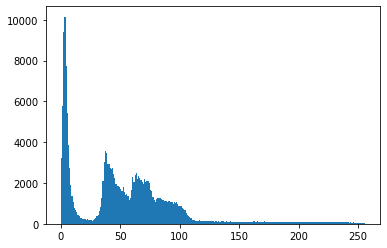

In [ ]:
# alternative way to find histogram of an image
plt.hist(my_img_2.ravel(),256,[0,256])
plt.show()

### **Image Encryption**

In [ ]:
row,col=my_img_2.shape[0],my_img_2.shape[1]
enc_2 = [[0 for x in range(3000)] for y in range(3000)]

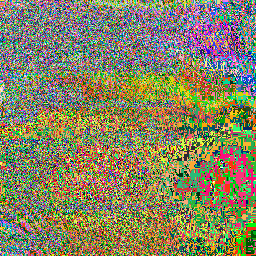

['Image 1', 'Image 2']
['Encryption', 'Encryption']
[3.0806164741516113, 3.1706533432006836]


In [ ]:
#Step 5: Encryption

start_time = time.time()

for i in range(0,256):
  for j in range(0,256):
    r,g,b=my_img_2[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc_2[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    my_img_2[i,j]=[C1,C2,C3]

# plt.imshow(my_img, cmap="gray")
cv2_imshow(my_img_2)

encryption_image.append("Image 2")
encryption_type.append("Encryption")
encryption_time.append(time.time() - start_time)

print(encryption_image)
print(encryption_type)
print(encryption_time)

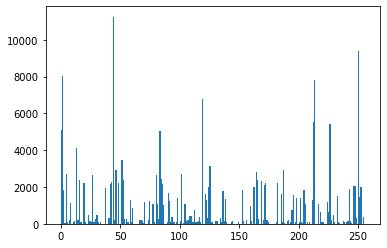

In [ ]:
# Find histogram of an image
plt.hist(my_img_2.ravel(),256,[0,256])
plt.show()

### **Image Decryption**

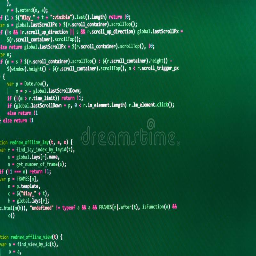

['Image 1', 'Image 2']
['Decryption', 'Decryption']
[2.521512269973755, 2.509552001953125]


In [ ]:
#Step 6: Decryption

start_time = time.time()

for i in range(0,256):
  for j in range(0,256):
    r,g,b=enc_2[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    my_img_2[i,j]=[M1,M2,M3]

cv2_imshow(my_img_2)
# plt.imshow(my_img, cmap="gray")

decryption_image.append("Image 2")
decryption_type.append("Decryption")
decryption_time.append(time.time() - start_time)

print(decryption_image)
print(decryption_type)
print(decryption_time)

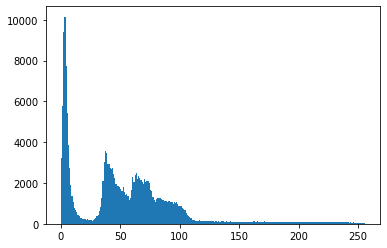

In [ ]:
# Find histogram of an image
plt.hist(my_img_2.ravel(),256,[0,256])
plt.show()

## **RSA algorithm with Image 3**

In [ ]:
#variables for storing time
time_taken_e_3 = []
time_taken_d_3 = []

### **Image Preprocessing**

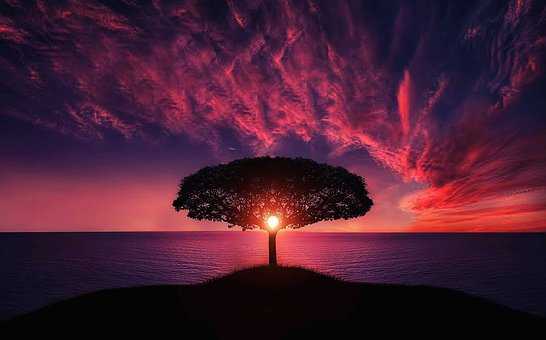


 (256, 256, 3)


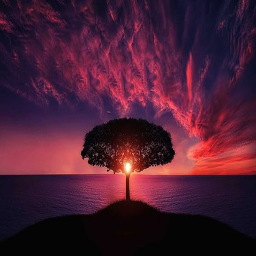

In [ ]:
my_img_3 = cv2.imread('drive/My Drive/CN_Project/3.jpg')
#print(my_img_3.shape)
cv2_imshow(my_img_3)
#plt.imshow(my_img_3, cmap="gray")

# Resizing
my_img_3 = cv2.resize(my_img_3,(256,256))
print('\n',my_img_3.shape)
cv2_imshow(my_img_3)

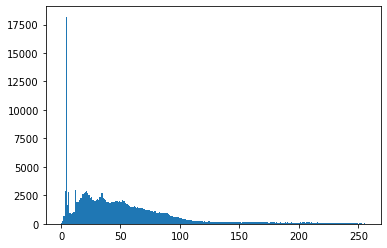

In [ ]:
# alternative way to find histogram of an image
plt.hist(my_img_3.ravel(),256,[0,256])
plt.show()

### **Image Encryption**

In [ ]:
row,col=my_img_3.shape[0],my_img_3.shape[1]
enc_3 = [[0 for x in range(3000)] for y in range(3000)]

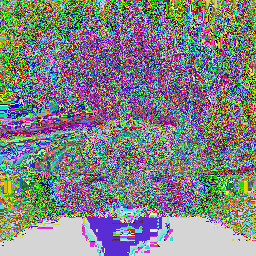

['Image 1', 'Image 2', 'Image 3']
['Encryption', 'Encryption', 'Encryption']
[3.0806164741516113, 3.1706533432006836, 4.216584920883179]


In [ ]:
#Step 5: Encryption

start_time = time.time()

for i in range(0,256):
  for j in range(0,256):
    r,g,b=my_img_3[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc_3[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    my_img_3[i,j]=[C1,C2,C3]

# plt.imshow(my_img, cmap="gray")
cv2_imshow(my_img_3)

encryption_image.append("Image 3")
encryption_type.append("Encryption")
encryption_time.append(time.time() - start_time)

print(encryption_image)
print(encryption_type)
print(encryption_time)

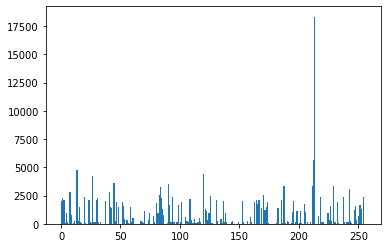

In [ ]:
# Find histogram of an image
plt.hist(my_img_3.ravel(),256,[0,256])
plt.show()

### **Image Decryption**

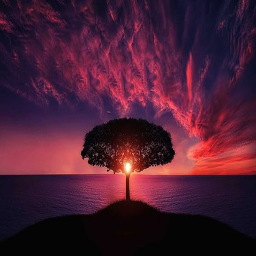

['Image 1', 'Image 2', 'Image 3']
['Decryption', 'Decryption', 'Decryption']
[2.521512269973755, 2.509552001953125, 2.5383832454681396]


In [ ]:
#Step 6: Decryption

start_time = time.time()

for i in range(0,256):
  for j in range(0,256):
    r,g,b=enc_3[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    my_img_3[i,j]=[M1,M2,M3]

cv2_imshow(my_img_3)
# plt.imshow(my_img, cmap="gray")

decryption_image.append("Image 3")
decryption_type.append("Decryption")
decryption_time.append(time.time() - start_time)

print(decryption_image)
print(decryption_type)
print(decryption_time)

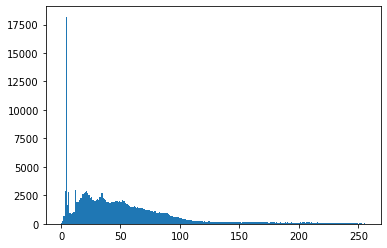

In [ ]:
# Find histogram of an image
plt.hist(my_img_3.ravel(),256,[0,256])
plt.show()

In [ ]:
print(encryption_image)
print(encryption_type)
print(encryption_time)

print(decryption_image)
print(decryption_type)
print(decryption_time)

['Image 1', 'Image 2', 'Image 3']
['Encryption', 'Encryption', 'Encryption']
[3.0806164741516113, 3.1706533432006836, 4.216584920883179]
['Image 1', 'Image 2', 'Image 3']
['Decryption', 'Decryption', 'Decryption']
[2.521512269973755, 2.509552001953125, 2.5383832454681396]


# **Encryption/ Decryption Analysis**

In [ ]:
import pandas as pd

In [ ]:
import xlwt
import xlsxwriter
from xlwt import Workbook

In [ ]:
from google.colab import files

In [ ]:
#creating worksheets

workbook = xlsxwriter.Workbook('RSA_Encryption_time.xlsx')
worksheet = workbook.add_worksheet()

workbook2 = xlsxwriter.Workbook('RSA_Decryption_time.xlsx')
worksheet2 = workbook2.add_worksheet()

In [ ]:
#Storing data in excel

row_num =0

worksheet.write('A1', 'Image')
worksheet.write('B1', 'Type')
worksheet.write('C1', 'Time')

row_num +=1

for row_num, data in enumerate(encryption_image):
    worksheet.write(row_num, 0, encryption_image[row_num])

for row_num, data in enumerate(encryption_type):
    worksheet.write(row_num, 1, encryption_type[row_num])

for row_num, data in enumerate(encryption_time):
    worksheet.write(row_num, 2, encryption_time[row_num])
workbook.close()

In [ ]:
#Storing data in excel

row_num =0

worksheet2.write('A1', 'Image')
worksheet2.write('B1', 'Type')
worksheet2.write('C1', 'Time')

row_num +=1

for row_num, data in enumerate(decryption_image):
    worksheet2.write(row_num, 0, decryption_image[row_num])

for row_num, data in enumerate(decryption_type):
    worksheet2.write(row_num, 1, decryption_type[row_num])

for row_num, data in enumerate(decryption_time):
    worksheet2.write(row_num, 2, decryption_time[row_num])
workbook2.close()

In [ ]:
files.download("RSA_Encryption_time.xlsx")
files.download("RSA_Decryption_time.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_excel("RSA_Encryption_time.xlsx")
df

,Image,Type,Time
0,Image 1,Encryption,3.080616
1,Image 2,Encryption,3.170653
2,Image 3,Encryption,4.216585


In [ ]:
df2 = pd.read_excel("RSA_Decryption_time.xlsx")
df2

,Image,Type,Time
0,Image 1,Decryption,2.521512
1,Image 2,Decryption,2.509552
2,Image 3,Decryption,2.538383


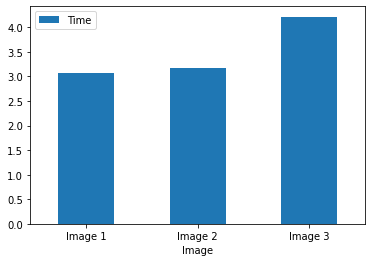

In [ ]:
df.plot.bar(x='Image', y='Time', rot=0)

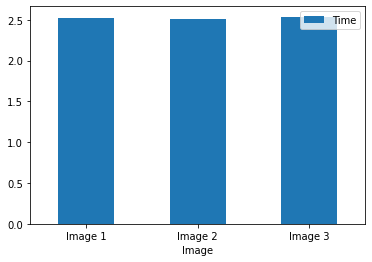

In [ ]:
df2.plot.bar(x='Image', y='Time', rot=0)

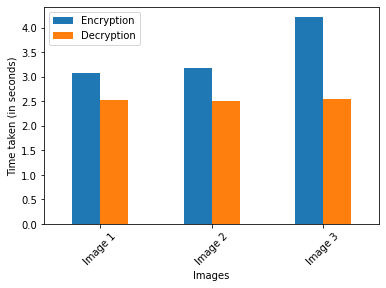

In [ ]:
df_c = pd.merge(df, df2, on='Image')
ax = df_c.plot.bar(x='Image', xlabel='Images', ylabel='Time taken (in seconds)', rot=45)
ax.legend(["Encryption", "Decryption"]);